<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
اضافه‌کردن ویژگی‌های جدید
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌ی خانه‌های شهر پکن، اطلاعات بسیار مفیدی در اختیار ما قرار می‌دهد، اما گاهی اوقات می‌توان با استفاده از ویژگی‌های موجود، ویژگی‌های جدیدی هم تولید کرد. برای مثال، با داشتن متراژ و قیمت کلی هر خانه، می‌توانیم برای هر خانه، قیمت هر متر مربع را حساب کنیم که یک ویژگی مهم در تحلیل اطلاعات مسکن می‌باشد. در این قسمت از پروژه دو ویژگی جدید به مجموعه‌داده خود اضافه می‌کنیم و پس از آن با ابزار‌های مصورسازی، شروع به رسم نمودار‌هایی برای بررسی روابط بین آن‌ها می‌کنیم.

</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا فایل مجموعه‌داده‌ی <code>housing_no_outlier.csv</code> را می‌خوانیم.
</font>
</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing_no_outlier = pd.read_csv('housing_no_outlier.csv', encoding='gbk')
housing_no_outlier

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285035,116.546899,39.755236,2016-06-09,1.0,355.5,134.20,3,2,1,2,9,2009,hardcover,steel-concrete composite,0.500,has elevator,no subway,3
285036,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,5,2003,other,steel-concrete composite,0.333,no elevator,no subway,3
285037,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,24,2009,other,steel-concrete composite,0.222,has elevator,has subway,3
285038,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,7,2000,Simplicity,steel-concrete composite,0.500,has elevator,no subway,3


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت اول
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
یکی از کارهای جذابی که در چنین تحلیل‌هایی می‌توان انجام داد، ساخت ویژگی جدید بر اساس ویژگی‌های موجود می‌باشد. البته این کار به‌شرطی باید انجام شود که ویژگی جدید، ویژگی مفیدی محسوب شود.
 به‌عنوان اولین قدم از شما می‌خواهیم فاصله‌ی هر خانه تا مرکز پایتخت چین را محاسبه کنید و در ستونی به اسم <code>distanceToCapital</code> ذخیره کنید.
    طول جغرافیایی (<code>longitude</code>) و عرض جغرافیایی (<code>latitude</code>) مرکز پایتخت چین به ترتیب <code>116.4074</code> و <code>39.9042</code> می‌باشند.
    برای محاسبه‌ی فاصله می‌توانید از فرمولی که در پایین آمده است استفاده کنید.
  دقت کنید که در محاسبات، باید همه‌ی زاویه‌ها را به رادیان تبدیل کنید. نام دیتافریم جدید که شامل این ستون است را <code>housing_capital</code> قرار دهید.
<br>
<br>
<span style="color:green"><b>راهنمایی:</b></span>
محاسبات را با نامپای انجام دهید.
</font>
</p>


$$ distance = acos(sinφ_1*sinφ_2 + cosφ_1*cosφ_2 * cos(λ_2-λ_1)) * 6371.0088 $$
$$ φ: \text{latitude} $$ 
$$ λ: \text{longitude} $$ 

In [2]:
from math import radians
capital_Lng = np.radians(116.4074)
capital_Lat = np.radians(39.9042)
housing_capital = housing_no_outlier.copy()
housing_capital['Lng']=np.radians(housing_capital['Lng'])
housing_capital['Lat']=np.radians(housing_capital['Lat'])
housing_capital['distanceToCapital'] = np.arccos((np.sin(capital_Lat))*(np.sin(housing_capital['Lat']))+(np.cos(capital_Lat))*(np.cos(housing_capital['Lat']))*(np.cos(housing_capital['Lng']-capital_Lng)))*6371.0088

housing_capital.head()


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital
0,2.032881,0.698472,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996
1,2.032504,0.696064,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224
2,2.032227,0.699460,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041
3,2.032059,0.696146,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335
4,2.032720,0.697981,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت دوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مجموعه‌داده، قیمت معامله‌شده و متراژ هر خانه مشخص است. اما قیمت هر متر مربع خانه مشخص نیست. در ستون <code>pricePerSquare</code> قیمت هر متر مربع خانه را محاسبه و ذخیره کنید. توجه کنید که قیمت کلی بر اساس <i>میلیون یوان</i> است. پس قیمتی که برای هر متر مربع از خانه حساب می‌کنید، باید در هزار ضرب شود تا قیمت بر اساس <i>یوان</i> به‌دست آید. نام دیتافریم حاصل را برابر <code>housing_PPS</code> قرار دهید.
</font>
</p>


In [3]:
housing_PPS = housing_capital.copy()

housing_PPS['pricePerSquare'] =housing_PPS['totalPrice']/housing_PPS['square']*1000

housing_PPS.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,2.032881,0.698472,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,2.032504,0.696064,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,2.032227,0.699460,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,2.032059,0.696146,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,2.032720,0.697981,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم با مصور‌سازی داده به روش‌های گوناگون، اطلاعاتی متناسب با نیاز های خود استخراج کنیم. مجموعه‌داده‌ی ما نه مقدار گم‌شده دارد، نه داده‌ی پرت دارد، و نه ستون‌هایی که با فرمت نامناسب ذخیره شده‌ باشند. در اولین قدم نگاهی به هیستوگرام ستون های عددی می‌اندازیم.
<br>
برای داشتن جدولی از هیستوگرام همه‌ی ستون‌های عددی، باید از تابع <code>hist</code> ‌استفاده کنیم. دقت کنید که تابع <code>hist</code> با چیزی که در آموزش‌های مربوط به رابط پانداز دیده بودیم فرق دارد. <code>plot(kint = ‘hist’)</code> هیستوگرام همه‌ی ستون‌ها را بر روی یک صفحه‌محور می‌کشید اما تابع <code>hist</code> برای هر ستون یک صفحه‌محور جداگانه رسم می‌کند.
</font>
</p>

C:\Users\USER\AppData\Local\Temp\ipykernel_12176\1182874507.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  housing_PPS.hist(ax = ax, bins = 50);


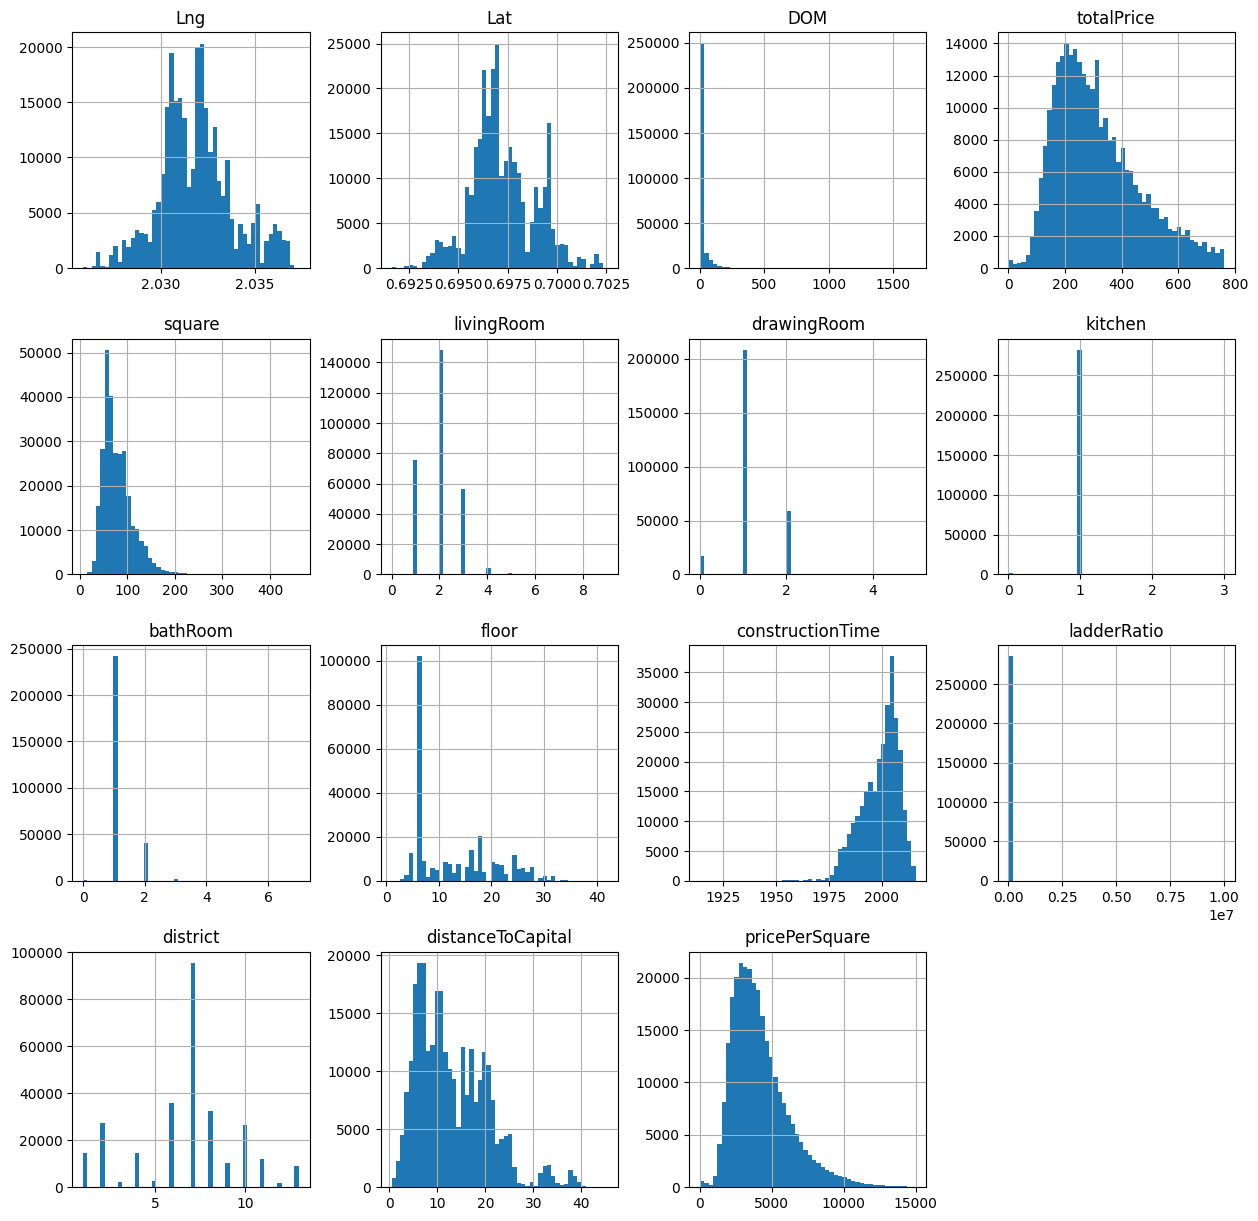

In [6]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_PPS.hist(ax = ax, bins = 50);


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به نمودار بالا، قیمت خانه یک خمیدگی به سمت قیمت ۲۰۰ میلیون یوان دارد. اکثر خانه‌ها حوالی سال ۲۰۰۰ ساخته شده‌اند. بیشترین فاصله از مرکز پایتخت ۴۰ کیلومتر است. اکثر خانه‌ها دو اتاق هال دارند. می‌توان اطلاعات بیشتری از این نمودار بیرون کشید.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بررسی تاثیر فاصله از مرکز بر روی قیمت‌ هر متر مربع</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم از ستون جدیدی که ساختیم استفاده کنیم و ببینیم که با دورشدن از مرکز شهر،‌ قیمت هر متر مربع از خانه چگونه تغییر می‌کند. برای این‌کار می توان از نمودار <code>regplot</code>  سیبورن استفاده کرد که علاوه بر نمایش نقاط،‌ با رگرسیون روند داده را نشان می‌دهد.
(اجرای سلول زیر ممکن است چند دقیقه طول بکشد.)
</font>
</p>

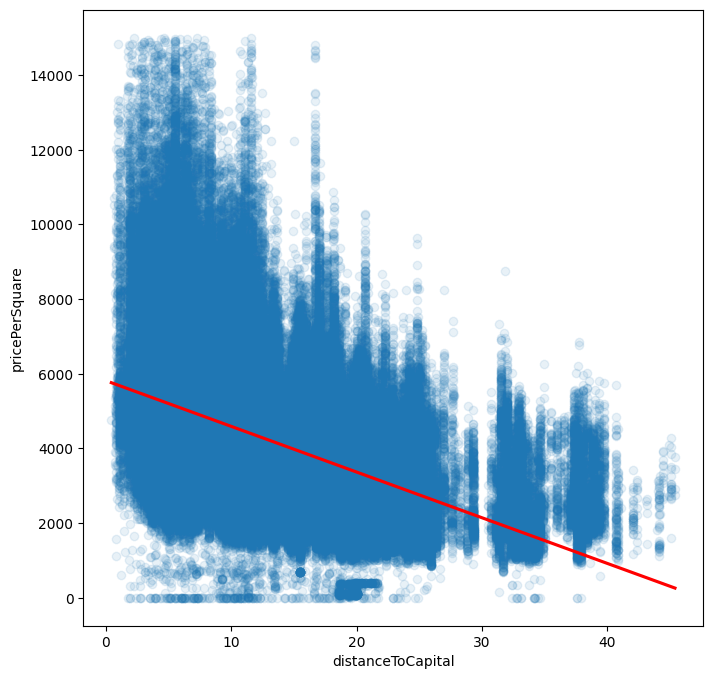

In [26]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش می‌خواهیم بررسی کنیم که داشتن آسانسور تا چه‌اندازه بر
<b>
 قیمت هر متر مربع
</b>
  خانه‌ها تاثیر می‌گذارد. برای این کار از نمودار‌های مختلفی می‌توان استفاده کرد. برای مثال با کمک نمودار میله‌ای می‌توان میانگین قیمت  خانه‌هایی که آسانسور دارند و آسانسور ندارند را مقایسه کرد یا با کمک نمودار جعبه‌ای می‌توان نموداری کشید که توزیع قیمت آن‌ها را نشان دهد. ما از نمودار چگالی برای مقایسه استفاده می‌کنیم.
<br>
<ul style="direction: rtl;text-align: right;">
  <li>
ابتدا یک شکل شامل یک صفحه‌محور بسازید و اندازه‌ی طول و عرض شکل را برابر ۶ اینچ قرار دهید.
</li>
  <li>
با استفاده از رابط پانداز، نمودار تخمین توزیع قیمت را برای خانه‌های بدون آسانسور رسم کنید. این نمودار را بر روی صفحه‌محوری که در مرحله‌ی قبل ساختید رسم کنید.
</li>
  <li>
سپس نمودار تخمین توزیع قیمت را برای خانه‌های دارای آسانسور روی همان صفحه‌محور رسم کنید.
</li>


  <li>
تنظیمات را طوری تغییر دهید که خروجی شما دقیقا مانند شکل زیر شود. رنگ‌های استفاده شده:
<ul>
<li>
رنگ عنوان شکل:‌ <code>red</code>
</li>
<li>
رنگ زمینه صفحه‌محور: <code>#ffffcc</code>
</li>
<li>
رنگ زمینه شکل: <code>khaki</code>
</li>
</ul>
</font>
</p>

<p style="text-align:center;"><img src="output.png"></p>

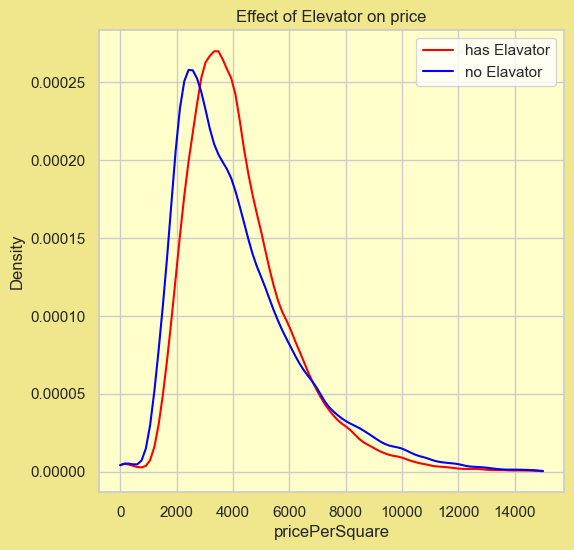

In [27]:
from scipy.stats import gaussian_kde
df_Has_Elevator=housing_PPS[housing_PPS['elevator']=='has elevator']['pricePerSquare']
df_No_Elevator=housing_PPS[housing_PPS['elevator']=='no elevator']['pricePerSquare']
kde_has_elavator=gaussian_kde(df_Has_Elevator)
kde_no_elavator=gaussian_kde(df_No_Elevator)
x_range=np.linspace(min(housing_PPS['pricePerSquare']),max(housing_PPS['pricePerSquare']),100)
fig , ax = plt.subplots()
fig.set_size_inches(6,6)
plt.plot(x_range,kde_has_elavator(x_range),color='red',label='has Elavator')
plt.plot(x_range,kde_no_elavator(x_range),color='blue',label='no Elavator')
plt.title('Effect of Elevator on price')
plt.xlabel('pricePerSquare')
plt.ylabel('Density')
plt.legend()
plt.gca().set_facecolor('#FFFFCC')
plt.gcf().set_facecolor('khaki')
plt.show()


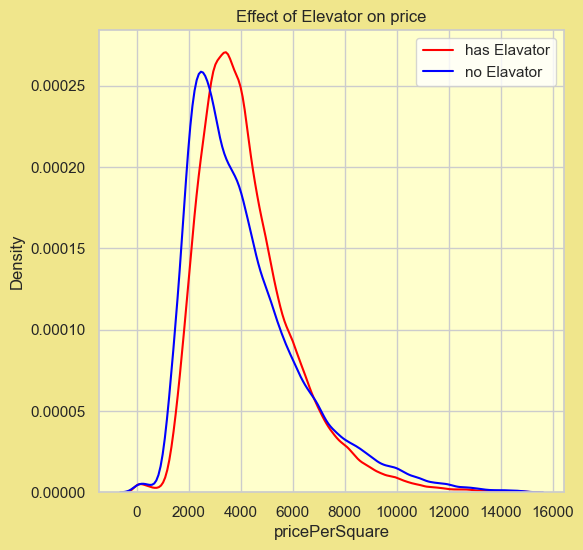

In [37]:
df_Has_Elevator=housing_PPS[housing_PPS['elevator']=='has elevator']
df_No_Elevator=housing_PPS[housing_PPS['elevator']=='no elevator']
df_No_Elevator
fig , ax = plt.subplots()
fig.set_size_inches(6,6)
sns.kdeplot(df_Has_Elevator,x='pricePerSquare',color='red',label='has Elavator')
sns.kdeplot(df_No_Elevator,x='pricePerSquare',color='blue',label='no Elavator')

plt.title('Effect of Elevator on price')
plt.xlabel('pricePerSquare')
plt.ylabel('Density')
plt.legend()
plt.gca().set_facecolor('#FFFFCC')
plt.gcf().set_facecolor('khaki')
plt.show()


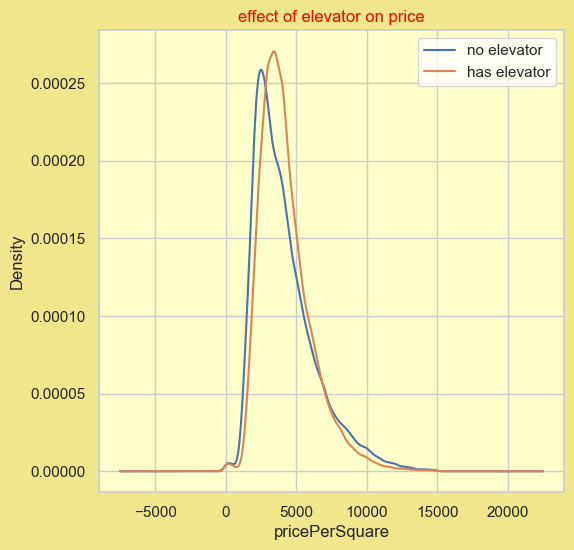

In [25]:
fig, ax = plt.subplots(figsize=(6, 6)) # To-Do

#fig.suptitle('effect of elevator on price', color = 'red')
ax.set_title('effect of elevator on price', color = 'red')
fig.set_facecolor('khaki')
ax.set_facecolor('#ffffcc')


tmp = housing_PPS[housing_PPS['elevator'] == 'no elevator']
tmp[['pricePerSquare', 'elevator']].plot.kde(ax=ax, legend= False)

tmp = housing_PPS[housing_PPS['elevator'] == 'has elevator']
tmp[['pricePerSquare', 'elevator']].plot.kde(ax=ax, legend= False)

ax.legend(labels=['no elevator', 'has elevator'])
ax.set_xlabel('pricePerSquare');


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتافریم نهایی را برای استفاده در مراحل بعدی پروژه در فایلی به‌نام <code>housing_extended.csv</code> ذخیره می‌کنیم.
</font>
</p>

In [8]:
housing_PPS.to_csv('housing_extended.csv', encoding='gbk', index=False)